<a href="https://colab.research.google.com/github/JSJeong-me/RNX/blob/main/entropy-0731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

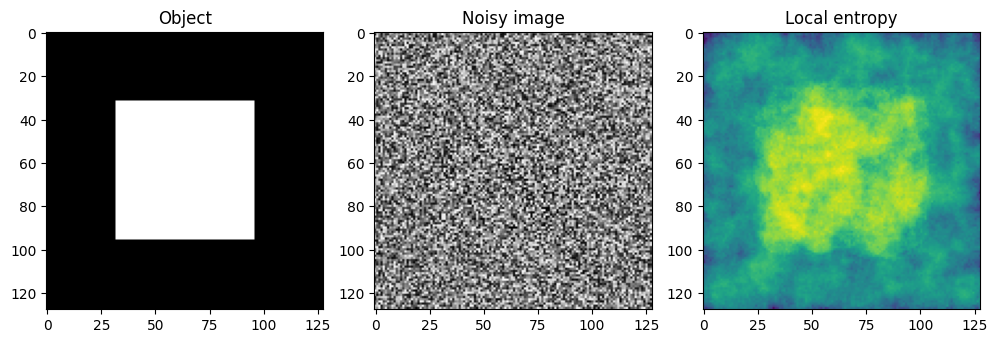

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

rng = np.random.default_rng()

noise_mask = np.full((128, 128), 28, dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * rng.random(noise_mask.shape) - 0.5
         * noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

img0 = ax0.imshow(noise_mask, cmap='gray')
ax0.set_title("Object")
ax1.imshow(img, cmap='gray')
ax1.set_title("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_title("Local entropy")

fig.tight_layout()

### Texture detection

In [2]:
from skimage.io import imread, imshow

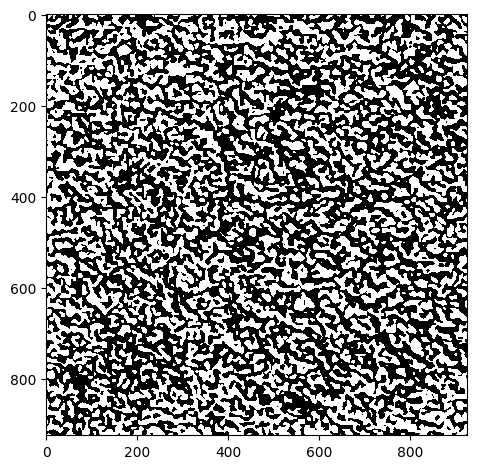

In [3]:
image = imread('2.jpg', as_gray=True)
imshow(image)

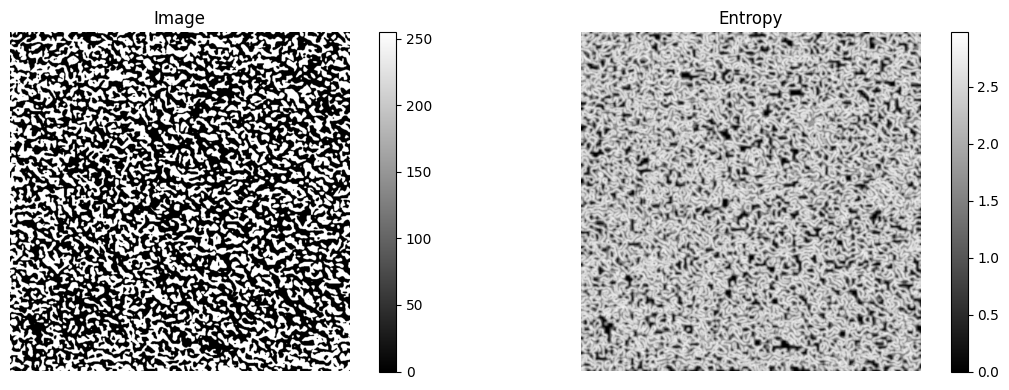

In [4]:
# image = img_as_ubyte(data.camera())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

plt.show()

### Removing small objects in grayscale images with a top hat filter

### https://en.wikipedia.org/wiki/Top-hat_transform   Top-hat transform


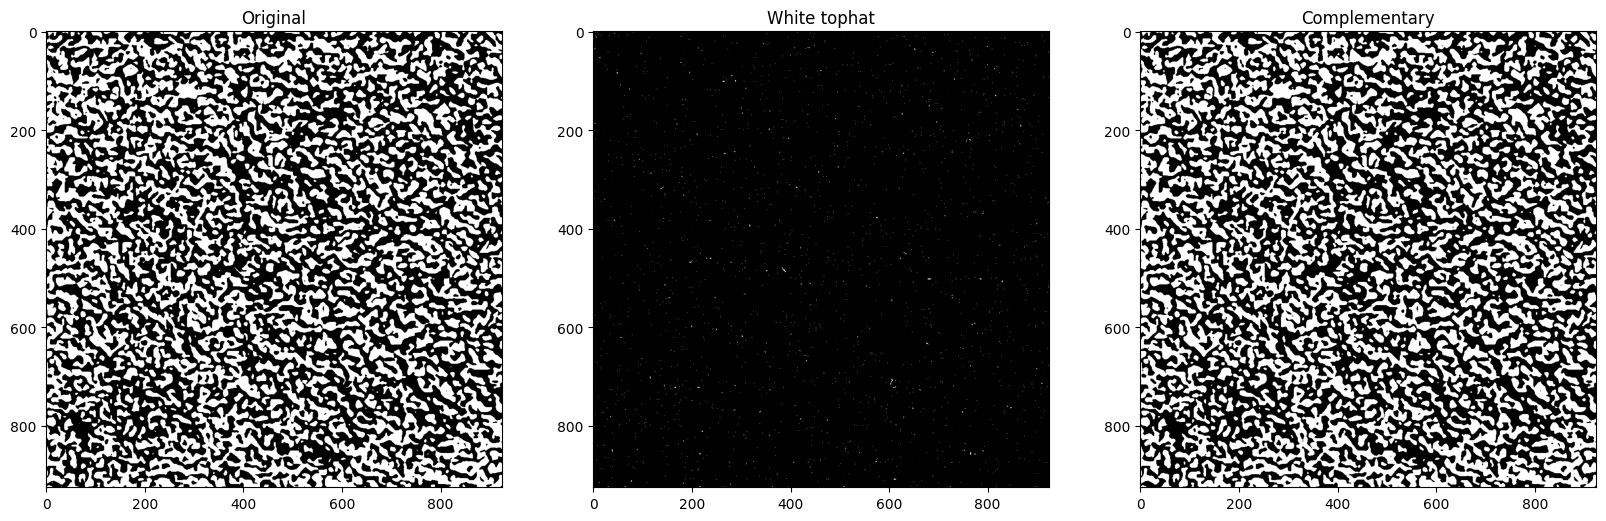

In [5]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

# image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(1)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()